## Polynomial Classification (using same dataset)

In [1]:
# import the packages
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# prepare the data
# Generate the dataset
X, y = make_moons(n_samples=600, noise=0.2, random_state=42)

# Create a DataFrame
dataset = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
dataset['Target'] = y

dataset.head(3)

,Feature1,Feature2,Target
0,0.581011,1.014319,0
1,0.696108,-0.437043,1
2,1.648974,0.073615,1


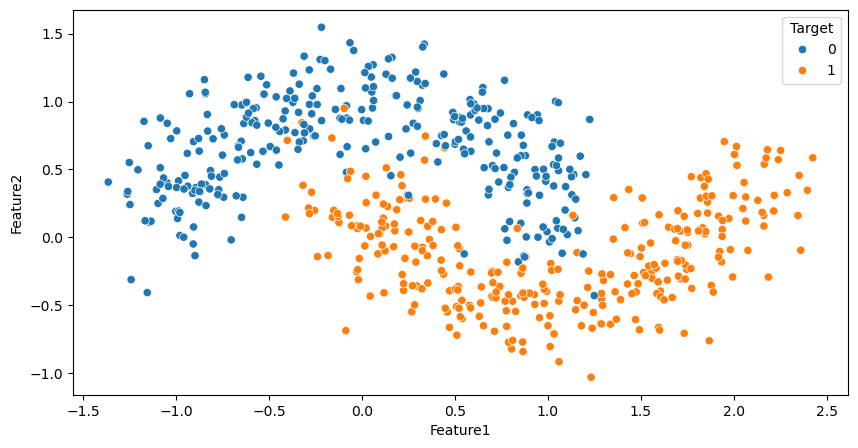

In [3]:
# check the graph for linearity 
plt.figure(figsize=(10,5))
sns.scatterplot(x='Feature1', y='Feature2', data=dataset, hue='Target')
plt.show()


In [4]:
# train test split
x = dataset.iloc[:, :-1]
y = dataset['Target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=62)

In [5]:
# prepare and test the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [6]:
lr.fit(x_train, y_train)

LogisticRegression()

In [7]:
# check the accuracy
lr.score(x_test, y_test)

0.9166666666666666

In [8]:
# now predict the target for --> 0.425280	-0.168292	1

dataset.head(10)
lr.predict([[0.425280,	-0.168292]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


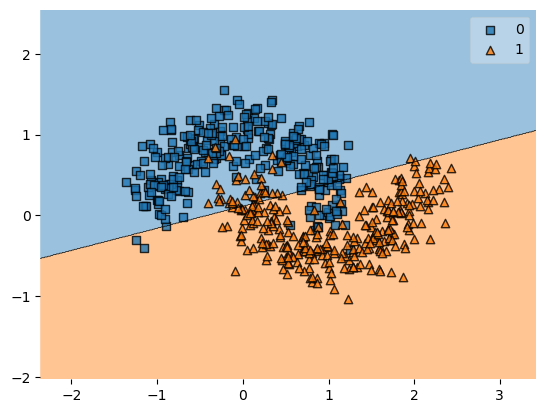

In [9]:
# now plot the graph
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

## Applying the Polynomial feature

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [12]:
# train test and split again
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=62)

In [13]:
# prepare and test the model

lr.fit(x_train, y_train)

LogisticRegression()

In [17]:
# check the accuracy
lr.score(x_test, y_test)

0.9583333333333334